## Pset 07
### Yining Hua

## 1. write a python function to run an external edgeR analysis
Write a python function that takes the name of an input counts file as an argument (and any other arguments you need), and returns the results of an edgeR analysis: gene names, log fold changes, log CPM, P-values, and FDRs (and any other data you find you want to return).

You can use the poor hacker's style: have your python script write an R script to a file, run the R script externally with Rscript (see hints), and parse the resulting output file.

Use the same edgeR analysis steps that Wiggins' analyze_W.r script used.



### Comment
I tried the code below, but unfortunately popen can not have the r script to write an output file. I appreciate if anyone can let me know why.

In [55]:
# import subprocess
# import os
# import re
# def process(input_file, output_file="out.txt"):
#     command = "!Rscript analyze_W.r %s %s"%(input_file, output_file)
#     print(command)
#     process = os.popen(command)
#     with open(output_file,"r") as file:
#         print(file)

So I'll not waste time on making it look better. Let's dissect the code 

In [56]:
## step 1: concat input files 
!join -t $'\t' w07-data.1.txt w07-data.2.txt > 'w07_12'
!join -t $'\t' w07-data.1.txt w07-data.3.txt > 'w07_13'
!join -t $'\t' w07-data.2.txt w07-data.3.txt > 'w07_23'

In [57]:
## step 2: revise the r script a bit to specify input file path
! grep -v "#" analyze_W.r


library(edgeR)
args = commandArgs(trailingOnly=TRUE)

group  <- factor(c(1,1,1,2,2,2))     

x     <- read.table(args[1], sep='\t', row.names=1)
y     <- DGEList(counts=x,group=group)
y     <- estimateDisp(y)
et    <- exactTest(y)
tab   <- topTags(et, nrow(x))

write.table(tab, file=args[2])


In [58]:
## execute
!Rscript analyze_W.r w07_12 out12
!Rscript analyze_W.r w07_13 out13
!Rscript analyze_W.r w07_23 out23

Loading required package: limma
Using classic mode.
Loading required package: limma
Using classic mode.
Loading required package: limma
Using classic mode.


In [59]:
## read the result
### I'll just do out12
!head out12

"logFC" "logCPM" "PValue" "FDR"
"rhubarb" -7.30404458459638 6.85592878807056 1.2649466807511e-31 1.33371646499977e-27
"lettuce" -7.08169402194066 12.9978176318645 1.71016193939563e-31 1.33371646499977e-27
"pomegranate" -7.11690470262085 12.6540286688078 1.99747860566088e-31 1.33371646499977e-27
"olive" -7.11410491485279 12.0970435754477 3.83211772182032e-31 1.91902875214457e-27
"asparagus" -7.10197346108237 10.9890041794302 6.46190580534054e-31 2.58876870373553e-27
"banana" -7.01024474784206 9.43519417285822 9.15217807896019e-31 3.05545465166086e-27
"chickpea" -7.01050698694148 9.53451724893932 2.26110271145122e-30 5.8790453488915e-27
"artichoke" -6.9220047529707 10.166412740368 2.60487200051963e-30 5.8790453488915e-27
"chestnut" -6.90563007688696 10.631611416659 2.6414761190167e-30 5.8790453488915e-27


Looks like the index column's not named.

In [61]:
import pandas as pd
out_12 = pd.read_table("out12", sep=" ", index_col=0)
out_12

,logFC,logCPM,PValue,FDR
rhubarb,-7.304045,6.855929,1.264947e-31,1.333716e-27
lettuce,-7.081694,12.997818,1.710162e-31,1.333716e-27
pomegranate,-7.116905,12.654029,1.997479e-31,1.333716e-27
olive,-7.114105,12.097044,3.832118e-31,1.919029e-27
asparagus,-7.101973,10.989004,6.461906e-31,2.588769e-27
...,...,...,...,...
VIT,-0.000171,5.496915,1.000000e+00,1.000000e+00
MT-ND5,-0.000113,5.940724,1.000000e+00,1.000000e+00
SBNO2,-0.000095,5.068007,1.000000e+00,1.000000e+00
RAET1E,-0.000011,1.425810,1.000000e+00,1.000000e+00


## 2. reproduce Wiggins' data, assign the missing labels
There are three possible combinations of Wiggins' data files: (1,2), (1,3), or (2,3). Using your Python function for running his edgeR analysis, run all three analyses.

Which combination did he run to obtain his result of 2107 differentially expressed genes significant at P<0.05?

Which of the three files corresponds to the mutant sand mouse samples? Why?




In [62]:
out_23 = pd.read_table("out23", sep=" ", index_col=0)
out_13 = pd.read_table("out13", sep=" ", index_col=0)

print("Num of genes with p<0.05 in %s: %i"%("out_12", len(out_12[out_12['PValue']<0.05])))
print("Num of genes with p<0.05 in %s: %i"%("out_13", len(out_13[out_13['PValue']<0.05])))
print("Num of genes with p<0.05 in %s: %i"%("out_23", len(out_23[out_23['PValue']<0.05])))


Num of genes with p<0.05 in out_12: 2107
Num of genes with p<0.05 in out_13: 1978
Num of genes with p<0.05 in out_23: 1018


See that 2107 in out_12? So combination of file 1 and 2 were used by Wiggins.\
The first file should be the muasnt sand mouse samples because 1+2 and 1+3 produced the same level of #differentially expressed genes (around 2000). Meanwhile #differentially expressed genes is much lower in the output file of 2+3, indicating that 2 and 3 should be normal wild type control mice.




## 3. Wiggins doesn't understand p-values
Do you agree with Wiggins' conclusion that 2107 genes are differentially expressed in that wt vs. mutant comparison? What did he fail to do?

Give a different conclusion of your own -- what is a more appropriate statistical cutoff, and how many genes are called differentially expressed at your threshold?


In [67]:
## how many genes we have? 
len(out_12)*0.05*(2107/len(out_12))

105.35000000000001

## Answer
I think the explanation in the lecture notes has made it clear (having 2001 significantly associated genes also doesn't make sense):
- the "PValue" is the probability per test (per gene). The FDR is, if you took all m "differentially expressed" gene in the list from this one and up, how many of those top m are expected to be false positives. Usually, we're interested in the set of predictions and how good it is, so it's more often the FDR that we're wanting to look at, and to control.

Usually in gene-related studies we use FDRs rather than P-values (Or really small p-values e.g. $p < 5e-8$), because there are too many tests being performed.

In [69]:
out_12[out_12.FDR<0.05]

,logFC,logCPM,PValue,FDR
rhubarb,-7.304045,6.855929,1.264947e-31,1.333716e-27
lettuce,-7.081694,12.997818,1.710162e-31,1.333716e-27
pomegranate,-7.116905,12.654029,1.997479e-31,1.333716e-27
olive,-7.114105,12.097044,3.832118e-31,1.919029e-27
asparagus,-7.101973,10.989004,6.461906e-31,2.588769e-27
...,...,...,...,...
NRBF2,1.933659,6.100198,7.529734e-05,2.556409e-02
SLC22A3,1.923916,7.697988,7.668450e-05,2.560112e-02
WDR5,1.982249,4.750166,9.018050e-05,2.961321e-02
KBTBD7,1.938968,2.261964,1.030004e-04,3.327743e-02


Using the threshold of FDR<0.05 we get 63 significantly associated genes, which makes much more sense.

### Let's also do cross files to check if this violates our hypothesis that 1 is the sandmouse file

In [80]:
print("Num of genes with FDR<0.05 in %s: %i"%("out_12", len(out_12[out_12['FDR']<0.05])))
print("Num of genes with FDR<0.05 in %s: %i"%("out_13", len(out_13[out_13['FDR']<0.05])))
print("Num of genes with FDR<0.05 in %s: %i"%("out_23", len(out_23[out_23['FDR']<0.05])))


Num of genes with FDR<0.05 in out_12: 63
Num of genes with FDR<0.05 in out_13: 63
Num of genes with FDR<0.05 in out_23: 0


Wow nice result, really proved that 2&3 were control groups and 1 was the sandmouse one.

## 4. Wiggins missed something else too
Wiggins' analysis has a subtler problem. It's missing an important step in the edgeR analysis pipeline, and it just happens (!) that this example exercises exactly the problem that that edgeR step is designed to deal with. Find it and fix it -- you'll need to add one step in the R analysis script -- and rerun the analysis. Now how many genes do you think are differentially expressed? What was the problem? (see hints)



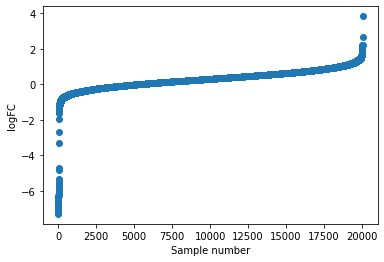

In [78]:
import matplotlib.pyplot as plt
out_12 = out_12.sort_values(by='logFC')
plt.scatter(list(range(len(out_12))), out_12['logFC'])
plt.ylabel('logFC')
plt.xlabel('Sample number')
plt.show()

This looks ok. Let's look at the significant ones


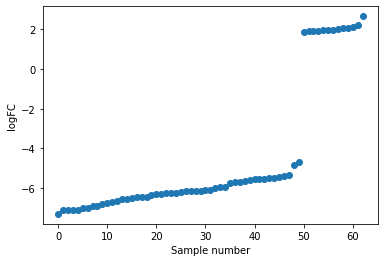

In [77]:
plt.scatter(list(range(len(out_12[out_12.FDR<0.05]))), out_12[out_12.FDR<0.05]['logFC'])
plt.ylabel('logFC')
plt.xlabel('Sample number')
plt.show()

Ahha there's a gap. Some genes might be too abundant (relatively) so the fold change was not consistent. Let's normalize them.

In [88]:
! grep -v "#" analyze_W.r


library(edgeR)
args = commandArgs(trailingOnly=TRUE)

group  <- factor(c(1,1,1,2,2,2))     

x     <- read.table(args[1], sep='\t', row.names=1)
y     <- DGEList(counts=x,group=group)
y     <- estimateDisp(y)
et    <- exactTest(y)
tab   <- topTags(et, nrow(x))

write.table(tab, file=args[2])


Let's add these:

```
keep  <- filterByExpr(y)        ## The filterByExpr function keeps rows that have worthwhile counts in 
                                ## a minumum number of samples. This one's probably unnecessary but 
                                ## let's add it just in case.
y     <- y[keep, , keep.lib.sizes=FALSE]
y     <- calcNormFactors(y)     ## normalization!
```

In [89]:
! grep -v "#" analyze_W.r


library(edgeR)
args = commandArgs(trailingOnly=TRUE)

group  <- factor(c(1,1,1,2,2,2))     

x     <- read.table(args[1], sep='\t', row.names=1)
y     <- DGEList(counts=x,group=group)
y     <- y[keep, , keep.lib.sizes=FALSE]
y     <- estimateDisp(y)
et    <- exactTest(y)
tab   <- topTags(et, nrow(x))

write.table(tab, file=args[2])


Added. Now let's run the analyses again.

In [96]:
!Rscript analyze_W.r w07_12 out12
out_12 = pd.read_table("out12", sep=" ", index_col=0)

Loading required package: limma
Using classic mode.


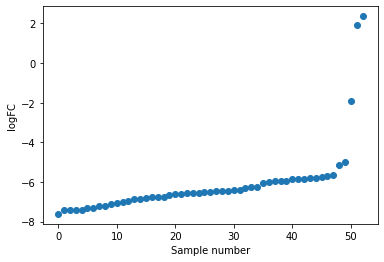

In [100]:
out_12 = out_12.sort_values(by='logFC')
plt.scatter(list(range(len(out_12[out_12.FDR<0.05]))), out_12[out_12.FDR<0.05]['logFC'])
plt.ylabel('logFC')
plt.xlabel('Sample number')
plt.show()

In [103]:
len(out_12[out_12.FDR<0.05])

53

Still some outliers, but better. We have 53 highly associated genese left.